In [1]:
# Building an NN model in PyTorch-----------------------------

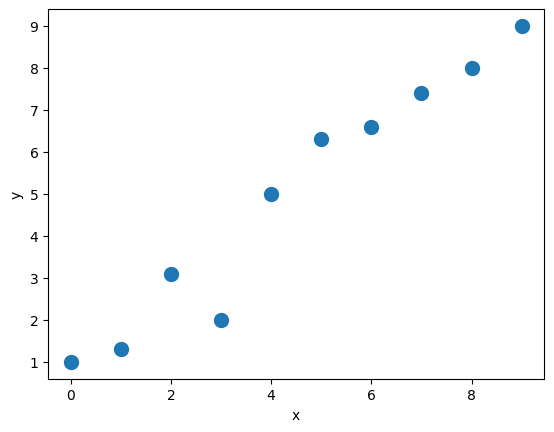

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,
    6.3, 6.6,7.4, 8.0,
    9.0], dtype='float32')


plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()



In [3]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1

train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [4]:
weight = torch.randn(1)
weight.requires_grad_()

bias = torch.zeros(1, requires_grad = True)

def model(xb):
    return xb @ weight +bias

def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [5]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias   -= bias.grad * learning_rate

        weight.grad.zero_()
        bias.grad.zero_()

    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():4f}')



Epoch 0 Loss 45.873714
Epoch 10 Loss 18.664724
Epoch 20 Loss 19.182400
Epoch 30 Loss 5.712081
Epoch 40 Loss 7.992949
Epoch 50 Loss 0.467898
Epoch 60 Loss 0.241025
Epoch 70 Loss 2.691317
Epoch 80 Loss 0.041726
Epoch 90 Loss 0.798837
Epoch 100 Loss 1.030189
Epoch 110 Loss 0.003299
Epoch 120 Loss 0.225753
Epoch 130 Loss 1.536943
Epoch 140 Loss 0.316529
Epoch 150 Loss 0.148557
Epoch 160 Loss 1.137611
Epoch 170 Loss 0.001240
Epoch 180 Loss 0.334100
Epoch 190 Loss 0.945057


Final Parameters: 2.677008628845215 4.88258695602417


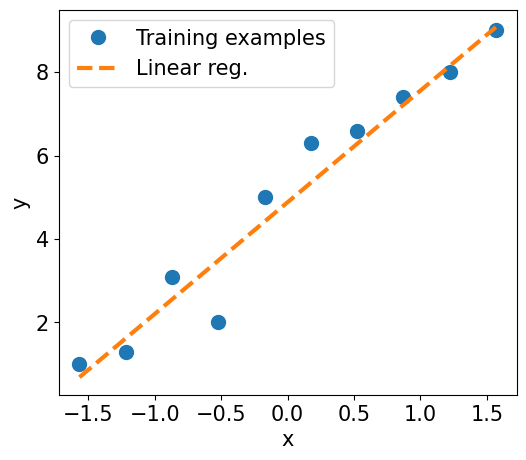

In [6]:
print('Final Parameters:', weight.item(), bias.item())
# Final Parameters:
# 2.669806480407715 4.879569053649902
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [7]:
import torch.nn as nn


loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1

learning_rate = 0.001
num_epochs = 200
log_epoch = 10

model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epoch==0:
        print(f"Epoch {epoch} Loss {loss.item():4f}")

Epoch 0 Loss 29.768688
Epoch 10 Loss 0.408130
Epoch 20 Loss 19.268738
Epoch 30 Loss 5.955838
Epoch 40 Loss 10.872255
Epoch 50 Loss 0.328748
Epoch 60 Loss 0.566058
Epoch 70 Loss 2.927252
Epoch 80 Loss 0.736642
Epoch 90 Loss 1.156927
Epoch 100 Loss 1.434416
Epoch 110 Loss 0.069512
Epoch 120 Loss 0.080445
Epoch 130 Loss 0.389477
Epoch 140 Loss 1.953377
Epoch 150 Loss 0.078388
Epoch 160 Loss 0.010887
Epoch 170 Loss 0.002196
Epoch 180 Loss 0.057394
Epoch 190 Loss 0.013282


In [8]:
print(f'Final Parameters : {model.weight.item(), model.bias.item()}')

Final Parameters : (2.661616563796997, 4.896816253662109)


In [9]:
# Building a multilayer perceptron for classifying flowers in the
# Iris dataset-------------------------------------------------------

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=1)

In [11]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)
train_dl = DataLoader(train_ds, batch_size=2, shuffle=True)

In [12]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size) -> None:
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)

        return x

In [13]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

In [14]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [15]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

print(loss_hist)


[1.111010901927948, 1.1022166538238525, 1.094401204586029, 1.086079306602478, 1.0768174052238464, 1.066487352848053, 1.0541986000537873, 1.039877049922943, 1.0237477958202361, 1.0071463561058045, 0.9884629070758819, 0.9693471789360046, 0.9504190111160278, 0.9327309334278107, 0.9165999114513397, 0.9024178969860077, 0.8905260813236237, 0.8800027215480805, 0.871429272890091, 0.86235475897789, 0.8566283679008484, 0.8494436800479889, 0.8434252512454986, 0.8379633176326752, 0.8326495265960694, 0.8276583623886108, 0.8224543416500092, 0.818532930612564, 0.8124559724330902, 0.8076609313488007, 0.8030346798896789, 0.7980619096755981, 0.7932737839221954, 0.7883791327476501, 0.7835324239730835, 0.779700573682785, 0.7743375790119171, 0.7702178025245666, 0.7654297399520874, 0.7605101644992829, 0.757477377653122, 0.7527817714214325, 0.7489669668674469, 0.7472187685966492, 0.7404836750030518, 0.7363358509540557, 0.7333560907840728, 0.7298214340209961, 0.725876077413559, 0.7231538951396942, 0.718931229

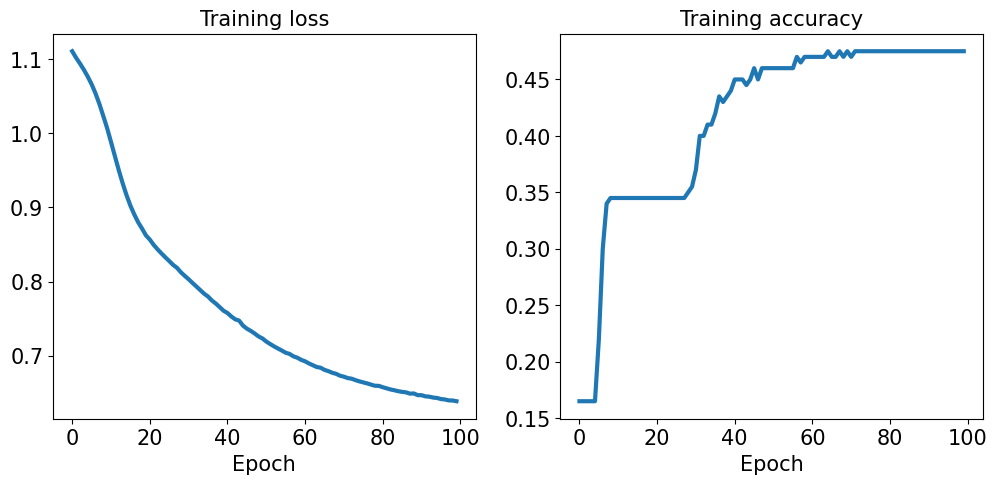

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [17]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800
